In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("customer_data.csv")
numeric_features = ['Age', 'Income', 'Tenure', 'SupportCalls']
scaled_cols = ['Age', 'Income', 'Tenure', 'SupportCalls']


In [15]:
# Load dataset
#step 1


# Quick peek
display(df.head())          
print("\n--- Info ---")
df.info()         
print("\n--- Describe ---")
display(df.describe())   



,CustomerID,Age,Gender,Income,Tenure,ProductType,SupportCalls,ChurnStatus
0,CUST0000,59.0,0,151203.0,4.0,0,1.0,0
1,CUST0001,69.0,0,58332.0,6.0,1,9.0,0
2,CUST0002,46.0,1,149481.0,2.0,0,12.0,0
3,CUST0003,32.0,1,115937.0,1.0,1,13.0,0
4,CUST0004,60.0,0,103929.0,4.0,1,5.0,0



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    3500 non-null   object 
 1   Age           3500 non-null   float64
 2   Gender        3500 non-null   int64  
 3   Income        3500 non-null   float64
 4   Tenure        3500 non-null   float64
 5   ProductType   3500 non-null   int64  
 6   SupportCalls  3500 non-null   float64
 7   ChurnStatus   3500 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 218.9+ KB

--- Describe ---


,Age,Gender,Income,Tenure,ProductType,SupportCalls,ChurnStatus
count,3500.000000,3500.000000,3.500000e+03,3500.000000,3500.000000,3500.000000,3500.000000
mean,43.606617,0.495714,1.406860e+05,5.041504,0.298857,10.078702,0.044857
std,14.553304,0.500053,4.225424e+05,2.505910,0.457822,21.197606,0.207020
min,14.000000,0.000000,2.503700e+04,0.000000,0.000000,1.000000,0.000000
25%,32.000000,0.000000,5.835050e+04,3.000000,0.000000,4.000000,0.000000
50%,43.606617,0.000000,9.304900e+04,5.000000,0.000000,7.000000,0.000000
75%,56.000000,1.000000,1.262345e+05,7.000000,1.000000,11.000000,0.000000
max,69.000000,1.000000,5.004849e+06,9.000000,1.000000,200.000000,1.000000


In [16]:
# Check missing values again
missing = df.isnull().sum()

print("Missing values before handling:\n", missing)

# Example: Fill numeric columns with mean, categorical with mode
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':   #?we use mean here since it better for numerical value
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])    #?we use mode here since it is not a numerical value


# Verify
print("\nMissing values after handling:\n", df.isnull().sum())


Missing values before handling:
 CustomerID      0
Age             0
Gender          0
Income          0
Tenure          0
ProductType     0
SupportCalls    0
ChurnStatus     0
dtype: int64

Missing values after handling:
 CustomerID      0
Age             0
Gender          0
Income          0
Tenure          0
ProductType     0
SupportCalls    0
ChurnStatus     0
dtype: int64


In [ ]:

#handling outliers


for col in numeric_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Optionally remove outliers using IQR method
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]   #remove outliers

print("\n Data after removing outliers:")
print(df.describe())

In [ ]:

scaler = StandardScaler() #z-score


df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

print("Scaled data preview:")
print(df.head())

In [ ]:

for col in numeric_features:
    plt.figure(figsize=(5, 3))
    plt.hist(x=df[col],color='skyblue', edgecolor='black')
    plt.grid(True)
    plt.title(f"histogram {col}")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:

categorical_features =  ['Gender' , 'ProductType' , 'ChurnStatus' ] 

for col in categorical_features:
    plt.figure(figsize=(5, 3))
    counts = df[col].value_counts()
    plt.bar(counts.index, counts.values, color='red', edgecolor='black')
    plt.title(f"bar {col}")
    plt.ylabel("Frequency")
    plt.show()

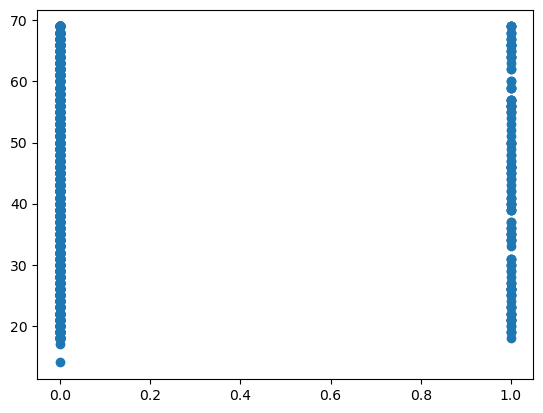

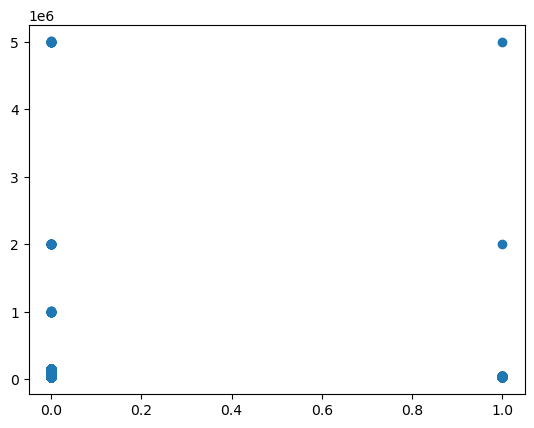

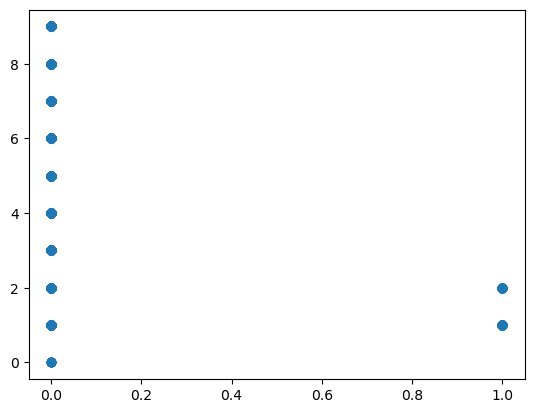

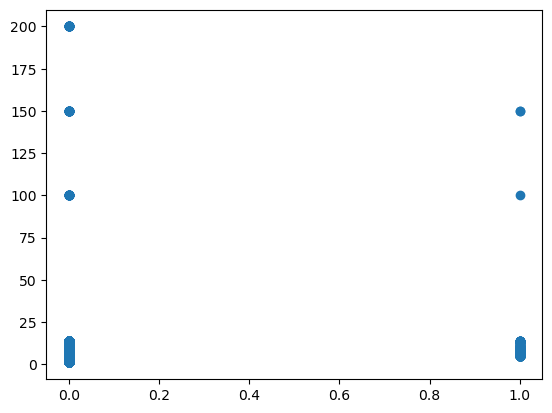

In [6]:

for col in numeric_features :
    plt.scatter(x=df['ChurnStatus'],y=df[col])
    plt.show()


In [5]:

corr_matrix = df[numeric_features].corr()
display(corr_matrix)


,Age,Income,Tenure,SupportCalls
Age,1.000000,0.043900,-0.011524,0.023650
Income,0.043900,1.000000,-0.006610,-0.015722
Tenure,-0.011524,-0.006610,1.000000,0.043005
SupportCalls,0.023650,-0.015722,0.043005,1.000000
